## **Наименование проекта : " Прогноз  риска развития рака легких "**

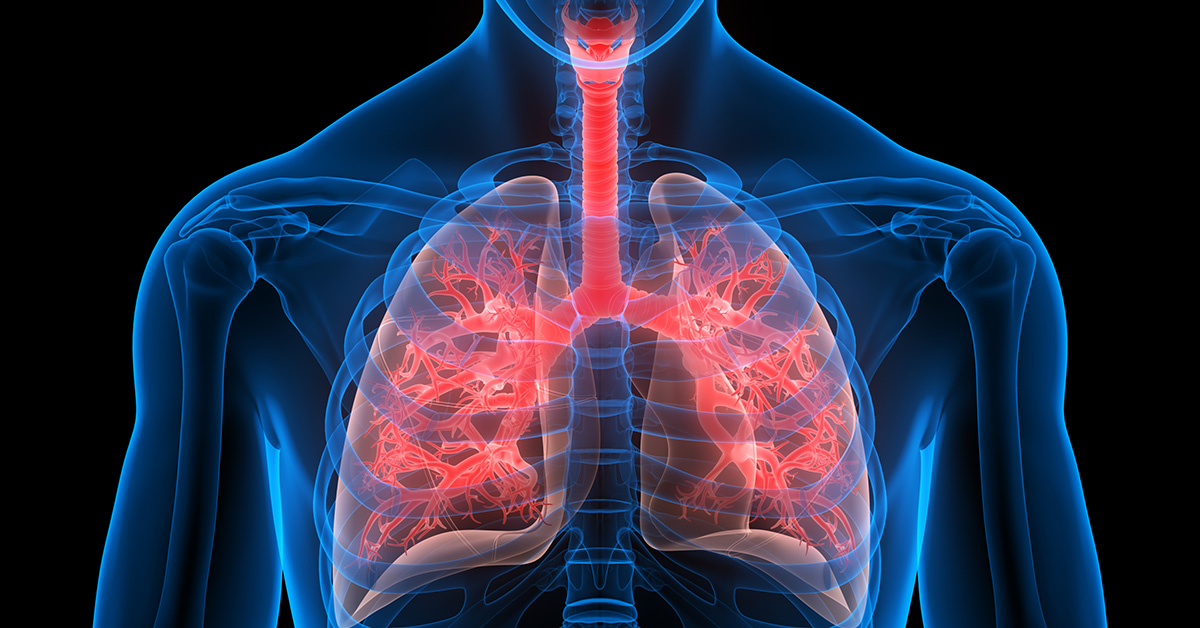

# **Идеи исследования:**

## - прогнозирование вероятности развития у пациента рака легких
## - выявление факторов риска рака легких


# Загрузка и предобработка данных

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from scipy.stats import chi2_contingency
import seaborn as sns
import pandas as pd
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.power import TTestIndPower




In [ ]:
df=pd.read_csv('/content/cancer patient data sets.csv')
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [ ]:
df.describe().T.style.background_gradient(cmap='RdBu_r')

,count,mean,std,min,25%,50%,75%,max
index,1000.000000,499.500000,288.819436,0.000000,249.750000,499.500000,749.250000,999.000000
Age,1000.000000,37.174000,12.005493,14.000000,27.750000,36.000000,45.000000,73.000000
Gender,1000.000000,1.402000,0.490547,1.000000,1.000000,1.000000,2.000000,2.000000
Air Pollution,1000.000000,3.840000,2.030400,1.000000,2.000000,3.000000,6.000000,8.000000
Alcohol use,1000.000000,4.563000,2.620477,1.000000,2.000000,5.000000,7.000000,8.000000
Dust Allergy,1000.000000,5.165000,1.980833,1.000000,4.000000,6.000000,7.000000,8.000000
OccuPational Hazards,1000.000000,4.840000,2.107805,1.000000,3.000000,5.000000,7.000000,8.000000
Genetic Risk,1000.000000,4.580000,2.126999,1.000000,2.000000,5.000000,7.000000,7.000000
chronic Lung Disease,1000.000000,4.380000,1.848518,1.000000,3.000000,4.000000,6.000000,7.000000
Balanced Diet,1000.000000,4.491000,2.135528,1.000000,2.000000,4.000000,7.000000,7.000000


In [ ]:
df.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [ ]:
df['Level'] = df['Level'].replace({'Low': 1, 'Medium': 2, 'High': 3})

In [ ]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,1
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,2
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,3
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,3
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,3


In [ ]:
df['Patient Id'] = df['Patient Id'].apply(lambda x: re.sub(r'\D', '', str(x))).astype('int64')

In [ ]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,1
1,1,10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,2
2,2,100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,3
3,3,1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,3
4,4,101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,3


In [ ]:
duplicates = df.duplicated()
if duplicates.any():
    print("Обнаружены дубликаты данных.")
    print(df[duplicates])
else:
    print("Дубликаты не найдены.")

Дубликаты не найдены.


# **Гипотеза**

## ***Гипотеза: Высокая степень риска заболевания раком легких у людей, которые чаще всего употребляют алкоголь.***


Проверяем гипотезу о том, что люди, которые чаще всего употребляют алкоголь, имеют более высокий риск заболевания раком легких. Алкоголь может негативно влиять на организм человека, вызывая различные вредные эффекты на клетки и ткани органов, включая легкие. Постоянное или чрезмерное употребление алкоголя может нарушить нормальную функцию легочных клеток, увеличивая вероятность развития раковых опухолей.



In [ ]:
cross_tab = pd.crosstab(df['Alcohol use'], df['Level'])

# Выполнение теста хи-квадрат
chi2, p_value, _, _ = chi2_contingency(cross_tab)
print("Результаты теста хи-квадрат:")
print("Статистика хи-квадрат:", chi2)
print("p-значение:", p_value)


if p_value < 0.05:
    print("Гипотеза подтверждается. Существует связь между употреблением алкоголя и риском заболевания раком легких.")
else:
    print("Гипотеза отвергается. Нет достаточных доказательств связи между употреблением алкоголя и риском заболевания раком легких.")

Результаты теста хи-квадрат:
Статистика хи-квадрат: 872.6917495190664
p-значение: 3.0552472876211455e-177
Гипотеза подтверждается. Существует связь между употреблением алкоголя и риском заболевания раком легких.


In [ ]:
# подсчет общего количества значений равных 3 в столбце "Level"
level_3_count = df[df['Level'] == 3]['Level'].count()

print('Общее количество значений равных 3 в столбце "Level":', level_3_count)

Общее количество значений равных 3 в столбце "Level": 365


In [ ]:
# подсчет статистики для столбца "Level" со значением 3 (высокий уровень употребления алкоголя)
high_level_count = df[df['Level'] == 3]['Alcohol use'].value_counts()

print('Количество пациентов с высоким уровнем употребления алкоголя в столбце "Level":')
print(high_level_count)



Количество пациентов с высоким уровнем употребления алкоголя в столбце "Level":
7    157
8    118
5     70
6     10
4     10
Name: Alcohol use, dtype: int64


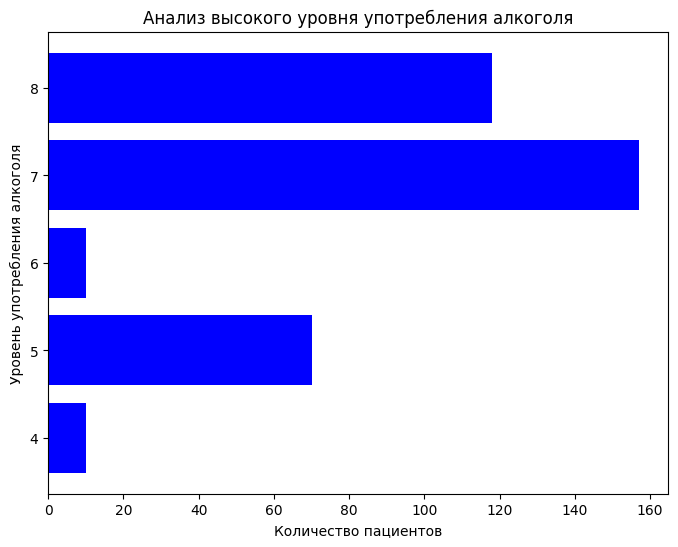

In [ ]:
plt.figure(figsize=(8, 6))
plt.barh(high_level_count.index, high_level_count.values, color='blue')

plt.title('Анализ высокого уровня употребления алкоголя')
plt.xlabel('Количество пациентов')
plt.ylabel('Уровень употребления алкоголя')


plt.show()

# Анализ мощности гипотезы

In [ ]:
effect_size = 0.5
alpha = 0.05
power = 0.8
sample_size = None

# Создание объекта для анализа мощности гипотезы
power_analysis = TTestIndPower()

# Расчет мощности гипотезы
sample_size = power_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, nobs1=None, ratio=1.0)

print("Результаты анализа мощности гипотезы:")
print("Размер выборки для достижения заданной мощности:", sample_size)

Результаты анализа мощности гипотезы:
Размер выборки для достижения заданной мощности: 63.765611775409525


**Выводы:**
1. Гипотеза, подтвержденная на основе значения хи-квадрат равного 872,7 и p-значения равного 3,00, указывает на значимую связь между переменными, тестируемыми в хи-квадратном тесте.

2. Результаты анализа мощности гипотезы указывают на то, что для достижения заданной мощности теста необходимо выбрать размер выборки равный примерно 63,7.

3. Из общего количества пациентов (365), уровень употребления алкоголя равный 8 имеют 118 пациентов, а уровень употребления алкоголя равный 7 имеют 157 пациентов. Эти результаты могут указывать на связь между уровнем употребления алкоголя и риском заболевания раком легких.

4. Исследование показывает, что среди пациентов с высоким риском заболевания раком легких, большинство принадлежит к категории уровня употребления алкоголя 7 и 8. Это свидетельствует о возможной ассоциации между уровнем употребления алкоголя и риском развития рака легких.

Выводы, основанные на предоставленной информации, подразумевают наличие связи между уровнем употребления алкоголя и риском заболевания раком легких.



#Анализ данных . Исследование и выявление факторов риска развития рака легкого

##Анализ поло-возрастной структуры

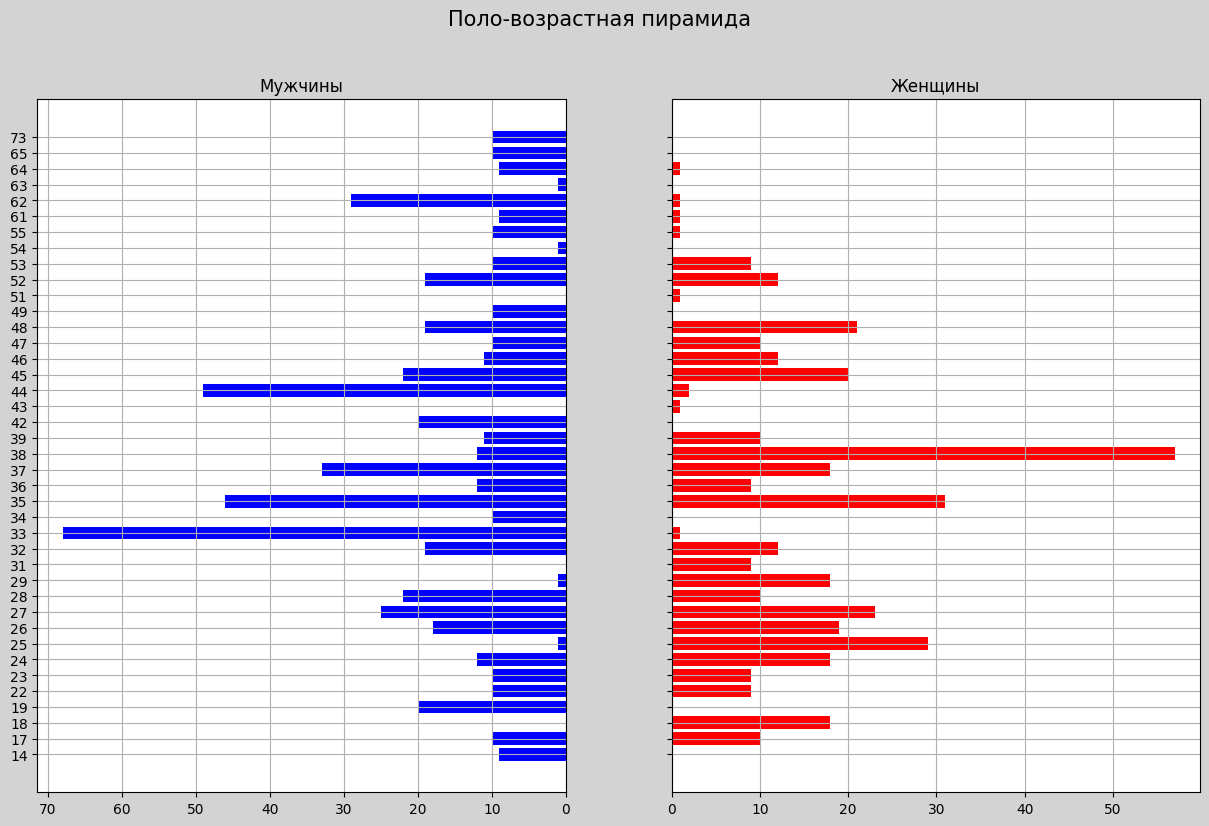

In [ ]:

data = df.groupby(['Age', 'Gender']).size().unstack()


y = range(len(data.index))
x_male = data[1].values
x_female = data[2].values


fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(15, 9))


fig.patch.set_facecolor('lightgray')
fig.suptitle('Поло-возрастная пирамида', fontsize=15, ha='center')


axes[0].barh(y, x_male, align='center', color='blue')
axes[0].set(title='Мужчины')
axes[1].barh(y, x_female, align='center', color='red')
axes[1].set(title='Женщины')


axes[1].grid()
axes[0].set(yticks=y, yticklabels=data.index)
axes[0].invert_xaxis()
axes[0].grid()


plt.show()

In [ ]:
# Подсчет количества мужчин и женщин
total_male = df[df['Gender'] == 1].shape[0]
total_female = df[df['Gender'] == 2].shape[0]
print("Общее количество мужчин:", total_male)
print("Общее количество женщин:", total_female)

Общее количество мужчин: 598
Общее количество женщин: 402


In [ ]:
# Фильтрация данных по полу и подсчет топ-3 возрастов
top_3_male = df[df['Gender'] == 1]['Age'].value_counts().head(3)
top_3_female = df[df['Gender'] == 2]['Age'].value_counts().head(3)

# Вывод результатов
print("Топ-3 возраста для мужчин:")
print(top_3_male)

print("\nТоп-3 возраста для женщин:")
print(top_3_female)

Топ-3 возраста для мужчин:
33    68
44    49
35    46
Name: Age, dtype: int64

Топ-3 возраста для женщин:
38    57
35    31
25    29
Name: Age, dtype: int64


**Выводы:**

1. В выборке преобладают мужчины, их количество составляет 598 человек, в то время как женщин - 402 человека. Это указывает на доминирование мужской части населения в данной группе.

2. При анализе возрастной структуры мужчин выявлены следующие тройки наиболее распространенных возрастов:
   - Мужчины в возрасте 33 года, их количество составляет 68 человек.
   - Мужчины в возрасте 44 года, их количество составляет 49 человек.
   - Мужчины в возрасте 35 лет, их количество составляет 46 человек.

3. Наиболее представленные возрастные группы у женщин:
   - Женщины в возрасте 38 лет, их количество составляет 57 человек.
   - Женщины в возрасте 35 лет, их количество составляет 31 человек.
   - Женщины в возрасте 25 лет, их количество составляет 29 человек.

Эта информация позволяет нам сделать вывод о половой структуре и распределении возрастов в выборке. Учитывая превалирующее присутствие мужчин в выборке и выделение наиболее распространенных возрастов для обоих полов, можно провести дополнительные исследования и анализы, чтобы лучше понять факторы, влияющие на эту структуру.

#Анализ выбросов

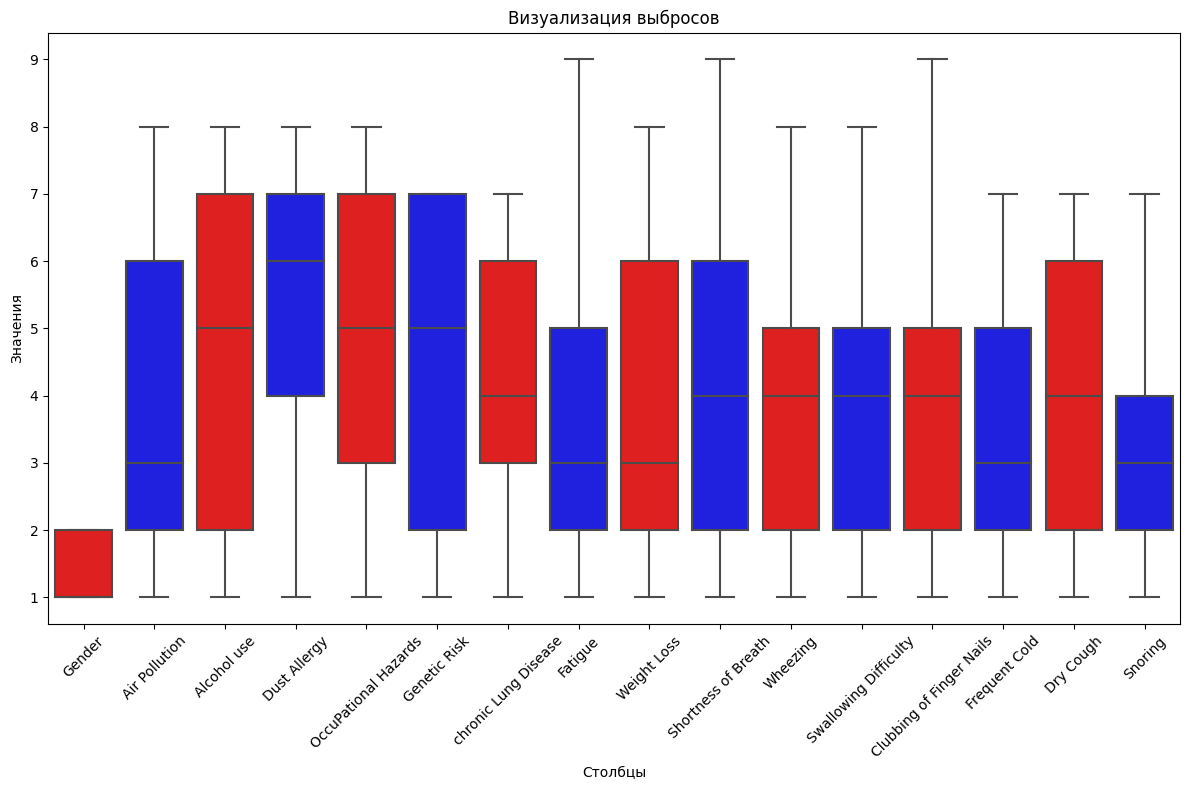

In [ ]:

columns = ['Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards',
           'Genetic Risk', 'chronic Lung Disease', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
           'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
           'Dry Cough', 'Snoring']


plt.figure(figsize=(12, 8))
sns.boxplot(data=df[columns], color='blue', palette=['red', 'blue'])
plt.xticks(rotation=45)
plt.title("Визуализация выбросов")
plt.xlabel("Столбцы")
plt.ylabel("Значения")


plt.tight_layout()

In [ ]:
def detect_outliers(data):

    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1


    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)


    outliers = []
    for value in data:
        if value < lower_bound or value > upper_bound:
            outliers.append(value)

    return outliers


columns_to_check = ['Age', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring']
outliers_dict = {}
for column in columns_to_check:
    outliers = detect_outliers(df[column])
    outliers_dict[column] = outliers


for column, outliers in outliers_dict.items():
    if len(outliers) == 0:
        print("В столбце", column, "отсутствуют выбросы.")
    else:
        print("Выбросы в столбце", column, ":", outliers)

Выбросы в столбце Age : [73, 73, 73, 73, 73, 73, 73, 73, 73, 73]
В столбце Air Pollution отсутствуют выбросы.
В столбце Alcohol use отсутствуют выбросы.
В столбце Dust Allergy отсутствуют выбросы.
В столбце OccuPational Hazards отсутствуют выбросы.
В столбце Genetic Risk отсутствуют выбросы.
В столбце chronic Lung Disease отсутствуют выбросы.
В столбце Fatigue отсутствуют выбросы.
В столбце Weight Loss отсутствуют выбросы.
В столбце Shortness of Breath отсутствуют выбросы.
В столбце Wheezing отсутствуют выбросы.
В столбце Swallowing Difficulty отсутствуют выбросы.
В столбце Clubbing of Finger Nails отсутствуют выбросы.
В столбце Frequent Cold отсутствуют выбросы.
В столбце Dry Cough отсутствуют выбросы.
В столбце Snoring отсутствуют выбросы.


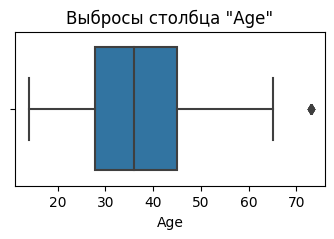

In [ ]:
fig, ax = plt.subplots(figsize=(4, 2))
sns.boxplot(data=df, x='Age', ax=ax)
ax.set_title('Выбросы столбца "Age"')

plt.show()

In [ ]:
# Определение границ выбросов
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]


display("Количество выбросов в столбце 'Age':", len(outliers))
display(outliers)

"Количество выбросов в столбце 'Age':"

10

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
15,15,111,73,1,5,6,6,5,6,5,...,4,3,6,2,1,2,1,6,2,2
126,126,211,73,1,5,6,6,5,6,5,...,4,3,6,2,1,2,1,6,2,2
237,237,311,73,1,5,6,6,5,6,5,...,4,3,6,2,1,2,1,6,2,2
348,348,411,73,1,5,6,6,5,6,5,...,4,3,6,2,1,2,1,6,2,2
459,459,511,73,1,5,6,6,5,6,5,...,4,3,6,2,1,2,1,6,2,2
570,570,611,73,1,5,6,6,5,6,5,...,4,3,6,2,1,2,1,6,2,2
681,681,711,73,1,5,6,6,5,6,5,...,4,3,6,2,1,2,1,6,2,2
792,792,811,73,1,5,6,6,5,6,5,...,4,3,6,2,1,2,1,6,2,2
889,889,9,73,1,5,6,6,5,6,5,...,4,3,6,2,1,2,1,6,2,2
903,903,911,73,1,5,6,6,5,6,5,...,4,3,6,2,1,2,1,6,2,2


In [ ]:
# Удаление выбросов
df_clean = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

# Вывод обновленного датафрейма без выбросов
display("Обновленный датафрейм без выбросов:")
display(df_clean)

'Обновленный датафрейм без выбросов:'

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,1
1,1,10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,2
2,2,100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,3
3,3,1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,3
4,4,101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,3
996,996,996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,3
997,997,997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,3
998,998,998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,3


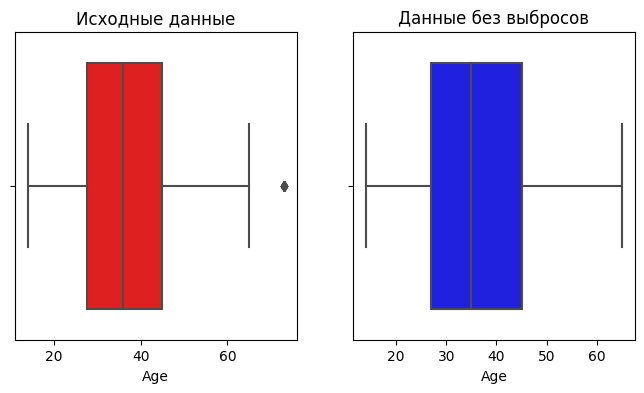

In [ ]:
# Создание двух графиков: исходные данные и данные без выбросов
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

sns.boxplot(data=df, x='Age', ax=ax1, color='red')
ax1.set_title('Исходные данные')

sns.boxplot(data=df_clean, x='Age', ax=ax2, color='blue')
ax2.set_title('Данные без выбросов')

plt.show()

**Выводы:**

В результате анализа выбросов в столбце "Age" было обнаружено, что количество выбросов составляет 10. Важно отметить, что все выбросы содержали одинаковые значения, поэтому они были удалены. Другие столбцы не содержат выбросов.

Удаление выбросов в этом случае имеет свои преимущества. Поскольку выбросы содержали одинаковые значения, они, скорее всего, представляют собой ошибку в данных или техническую проблему при сборе информации. Удаление этих выбросов позволяет существенно улучшить качество и достоверность данных, что, в свою очередь, может способствовать более точному анализу и принятию обоснованных решений.

# **Взаимосвязь между  употребления алкоголя и уровнем риска  заболевания рака легкого**

In [ ]:
# Группировка данных по уровням
alcohol_counts = df.groupby('Level')['Alcohol use'].sum()

data = {'Уровень': [f'\033[1;34mуровень{level}\033[0m' for level in alcohol_counts.index],
      'Количество употребляющих алкоголь': [f'\033[31m\033[1m{count}\033[0m' for count in alcohol_counts.values]}
df_counts = pd.DataFrame(data)

print(tabulate(df_counts, headers='keys', tablefmt='github', showindex=False))

| Уровень   |   Количество употребляющих алкоголь |
|-----------|-------------------------------------|
| уровень1  |                                 676 |
| уровень2  |                                1394 |
| уровень3  |                                2493 |


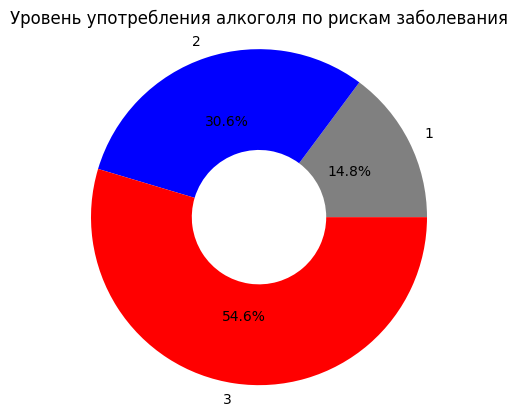

In [ ]:
colors = ['gray', 'blue', 'red']
plt.pie(alcohol_counts.values, labels=alcohol_counts.index, colors=colors, autopct='%1.1f%%', wedgeprops=dict(width=0.6))
plt.title('Уровень употребления алкоголя по рискам заболевания')
plt.axis('equal')
plt.show()

**Выводы:**

По результатам анализа уровня употребления алкоголя и риска заболевания раком можно сделать следующие выводы:

1. Высокий риск заболевания раком: Уровень употребления алкоголя составляет 2493. Это означает, что люди с высоким уровнем употребления алкоголя имеют повышенный риск развития раковых заболеваний.

2. Средний риск заболевания раком: Уровень употребления алкоголя составляет 1394. Люди с таким уровнем употребления алкоголя также имеют некоторый риск заболевания раком.

3. Низкий риск заболевания раком: Уровень употребления алкоголя составляет 676. Люди с низким уровнем употребления алкоголя имеют относительно низкий риск заболевания раком.

В целом, данные показывают прямую связь между уровнем употребления алкоголя и риском заболевания раком. Более высокий уровень употребления алкоголя связан с повышенным риском.

#Взаимосвязь генетического риска  и уровнем риска заболеваемости рака легких

In [ ]:
# Группировка данных по уровням
gen_counts = df.groupby('Level')['Genetic Risk'].sum()

data = {'Уровень': [f'\033[1;34mуровень{level}\033[0m' for level in gen_counts.index],
      'Количество пациентов с генетическим риском': [f'\033[31m\033[1m{count}\033[0m' for count in gen_counts.values]}
df_counts = pd.DataFrame(data)

print(tabulate(df_counts, headers='keys', tablefmt='github', showindex=False))

| Уровень   |   Количество пациентов с генетическим риском |
|-----------|----------------------------------------------|
| уровень1  |                                          828 |
| уровень2  |                                         1425 |
| уровень3  |                                         2327 |


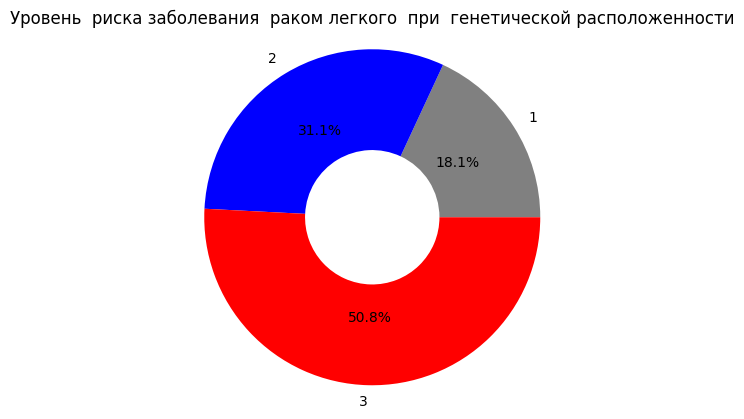

In [ ]:
colors = ['gray', 'blue', 'red']
plt.pie(gen_counts.values, labels=gen_counts.index, colors=colors, autopct='%1.1f%%', wedgeprops=dict(width=0.6))
plt.title('Уровень  риска заболевания  раком легкого  при  генетической расположенности')
plt.axis('equal')
plt.show()

**Выводы:**



1. Высокий риск заболевания раком: Уровень генетической предрасположенности составляет 2327. Это означает, что люди с высоким генетическим риском имеют повышенную предрасположенность к развитию рака легких.

2. Средний риск заболевания раком: Уровень генетической предрасположенности составляет 1427. Люди с таким уровнем генетического риска имеют среднюю предрасположенность к развитию рака легких.

3. Низкий риск заболевания раком: Уровень генетической предрасположенности составляет 828. Люди с низким уровнем генетического риска имеют относительно низкую предрасположенность к развитию рака легких.

В целом, данные указывают на существование взаимосвязи между генетическим риском и уровнем предрасположенности к раку легких.

#Взаимосвязь между хроническими заболеваниями легких  и уровнем риска заболеваемости рака легких

In [ ]:
# Группировка данных по уровням
xr_counts = df.groupby('Level')['chronic Lung Disease'].sum()

data = {'Уровень': [f'\033[1;34mуровень{level}\033[0m' for level in xr_counts.index],
      'Количество хронических заболеваний легких': [f'\033[31m\033[1m{count}\033[0m' for count in xr_counts.values]}
df_counts = pd.DataFrame(data)

print(tabulate(df_counts, headers='keys', tablefmt='github', showindex=False))

| Уровень   |   Количество хронических заболеваний легких |
|-----------|---------------------------------------------|
| уровень1  |                                         937 |
| уровень2  |                                        1316 |
| уровень3  |                                        2127 |


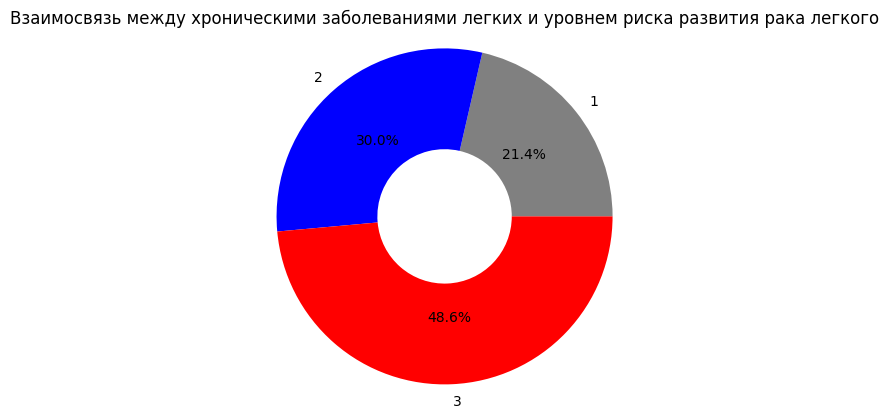

In [ ]:
colors = ['gray', 'blue', 'red']
plt.pie(xr_counts.values, labels=xr_counts.index, colors=colors, autopct='%1.1f%%', wedgeprops=dict(width=0.6))
plt.title('Взаимосвязь между хроническими заболеваниями легких и уровнем риска развития рака легкого')
plt.axis('equal')
plt.show()

#Взаимосвязь между ожирением и уровнем риска развития рака легкого

In [ ]:
# Группировка данных по уровням
obi_counts = df.groupby('Level')['Obesity'].sum()

data = {'Уровень': [f'\033[1;34mуровень{level}\033[0m' for level in obi_counts.index],
      'Количество ожирения': [f'\033[31m\033[1m{count}\033[0m' for count in obi_counts.values]}
df_counts = pd.DataFrame(data)

print(tabulate(df_counts, headers='keys', tablefmt='github', showindex=False))

| Уровень   |   Количество ожирения |
|-----------|-----------------------|
| уровень1  |                   730 |
| уровень2  |                  1296 |
| уровень3  |                  2439 |


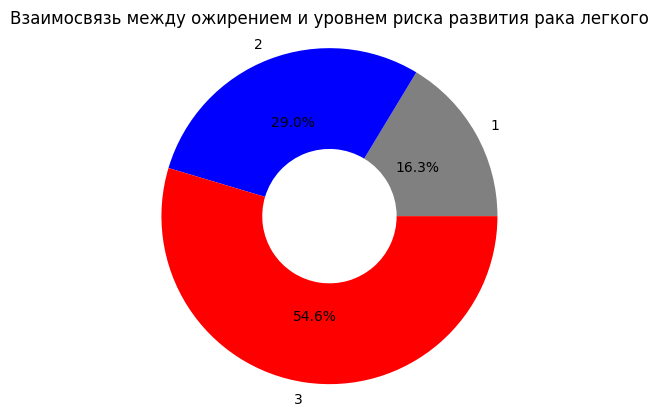

In [ ]:
colors = ['gray', 'blue', 'red']
plt.pie(obi_counts.values, labels=obi_counts.index, colors=colors, autopct='%1.1f%%', wedgeprops=dict(width=0.6))
plt.title('Взаимосвязь между ожирением и уровнем риска развития рака легкого')
plt.axis('equal')
plt.show()

**Выводы:**

1. Высокий риск заболевания раком: Уровень ожирения составляет 2439. Это означает, что люди с высоким уровнем ожирения имеют повышенный риск развития рака легких.

2. Средний риск заболевания раком: Уровень ожирения составляет 1296. Люди с таким уровнем ожирения имеют средний риск развития рака легких.

3. Низкий риск заболевания раком: Уровень ожирения составляет 730. Люди с низким уровнем ожирения имеют относительно низкий риск развития рака легких.

В целом, данные указывают на взаимосвязь между ожирением и уровнем риска развития рака легких.

#Взаимосвязь между курением и уровнем риска развития рака легкого

In [ ]:
# Группировка данных по уровням и подсчет курящих
smoke_counts = df.groupby('Level')['Smoking'].sum()

data = {'Уровень': [f'\033[1;34mуровень{level}\033[0m' for level in smoke_counts.index],
        'Количество курящих': [f'\033[31m\033[1m{count}\033[0m' for count in smoke_counts.values]}
df_smoke_counts = pd.DataFrame(data)

print(tabulate(df_smoke_counts, headers='keys', tablefmt='github'))

|    | Уровень   |   Количество курящих |
|----|-----------|----------------------|
|  0 | уровень1  |                  916 |
|  1 | уровень2  |                  815 |
|  2 | уровень3  |                 2217 |


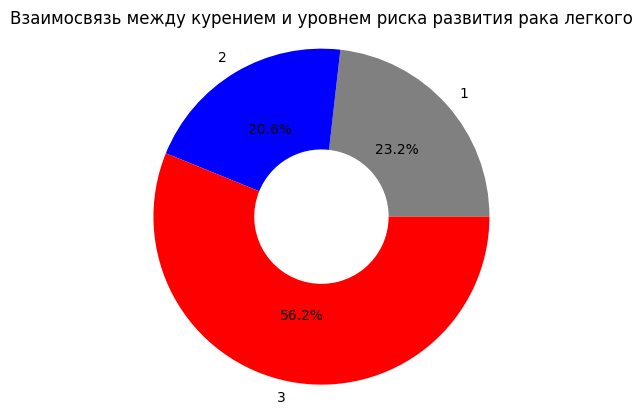

In [ ]:
colors = ['gray', 'blue', 'red']
plt.pie(smoke_counts.values, labels=smoke_counts.index, colors=colors, autopct='%1.1f%%', wedgeprops=dict(width=0.6))
plt.title('Взаимосвязь между курением и уровнем риска развития рака легкого')
plt.axis('equal')
plt.show()

**Выводы:**

1. Высокий риск заболевания раком легких: В данной группе находится 2217 курящих. Это может свидетельствовать о более высокой вероятности развития рака легких у курящих лиц.

2. Средний риск заболевания раком легких: В данной группе содержится 815 курящих. Хотя численность курящих здесь ниже, чем в группе высокого риска, но все равно достаточно значительная.

3. Низкий риск заболевания раком легких: В данной группе содержится 916 курящих. Здесь наблюдается наименьшее количество курящих в сравнении с другими группами. Это указывает на более низкую вероятность развития рака легких у этих людей, но всё равно присутствует связь между курением и риском развития заболевания.



# **Симптоматика  рака легкого в зависимости от риска развития рака легкого**

<ipython-input-35-944360118cb0>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  symptom_counts = df.groupby('Level')['Fatigue', 'Chest Pain', 'Coughing of Blood', 'Weight Loss', 'Shortness of Breath', 'Wheezing'].sum()


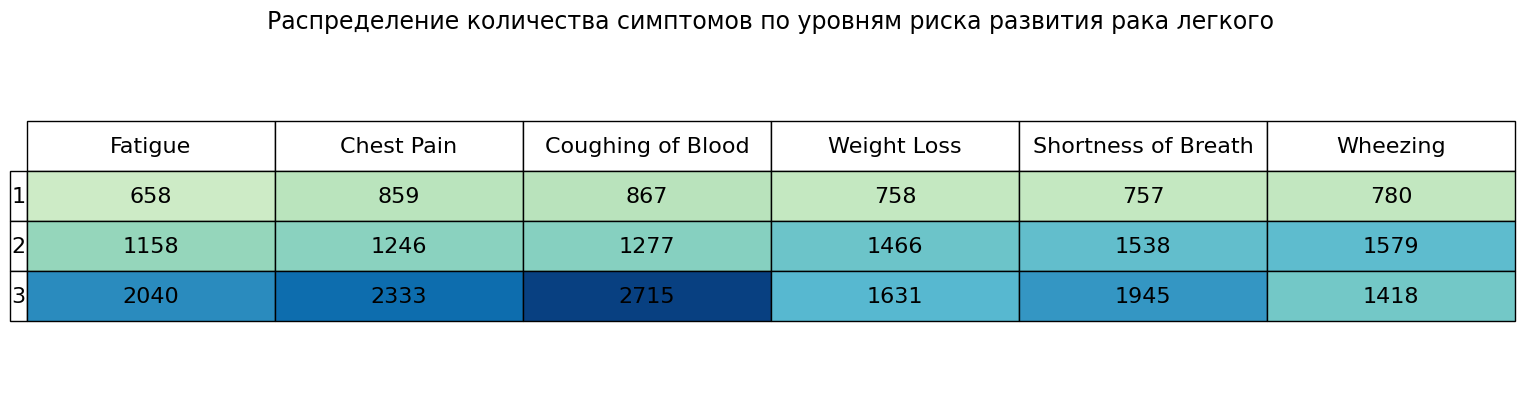

In [ ]:
# Группировка данных по уровням и подсчет симптомов
symptom_counts = df.groupby('Level')['Fatigue', 'Chest Pain', 'Coughing of Blood', 'Weight Loss', 'Shortness of Breath', 'Wheezing'].sum()

fig, ax = plt.subplots()
table = ax.table(cellText=symptom_counts.values,
                 rowLabels=symptom_counts.index,
                 colLabels=symptom_counts.columns,
                 cellLoc='center',
                 loc='center',
                 cellColours=plt.cm.GnBu(symptom_counts.values / symptom_counts.values.max()))

table.auto_set_font_size(False)
table.set_fontsize(16)
table.scale(3, 3)
ax.axis('off')
plt.title('Распределение количества симптомов по уровням риска развития рака легкого', fontsize=17)

plt.show()

<ipython-input-36-fe5040d7cdf7>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  simptom_counts = df.groupby('Level')['Fatigue', 'Chest Pain', 'Coughing of Blood', 'Weight Loss', 'Shortness of Breath', 'Wheezing'].sum()


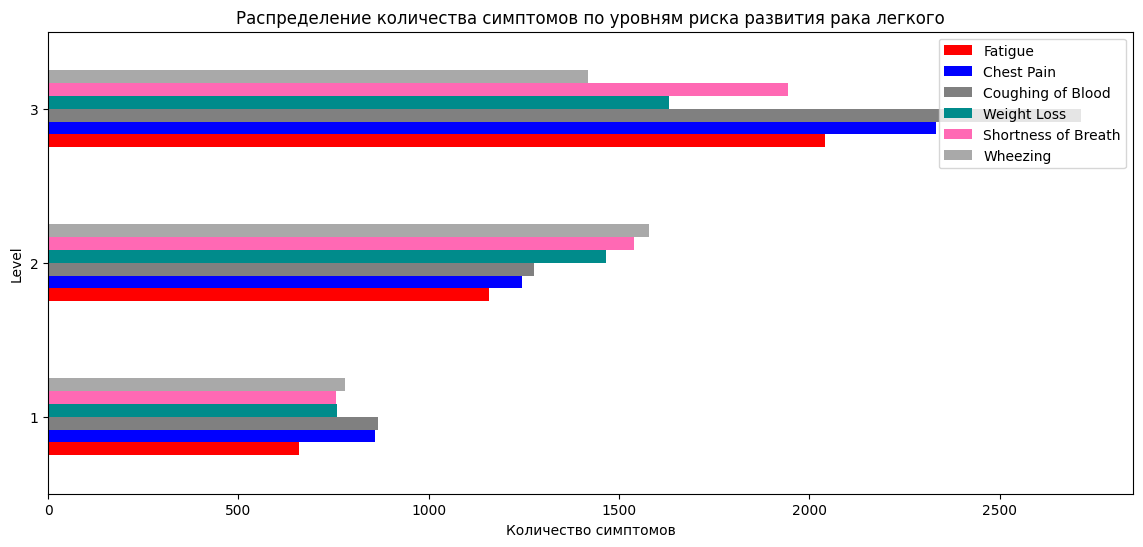

In [ ]:
simptom_counts = df.groupby('Level')['Fatigue', 'Chest Pain', 'Coughing of Blood', 'Weight Loss', 'Shortness of Breath', 'Wheezing'].sum()

colors = ['red', 'blue', 'gray', 'darkcyan', 'hotpink', 'darkgray']

simptom_counts.plot(kind='barh', color=colors, figsize=(14, 6))
plt.xlabel('Количество симптомов')
plt.title('Распределение количества симптомов по уровням риска развития рака легкого')
plt.legend(loc='upper right')

plt.show()

**Выводы:**

Уровень 1:

- Симптомы уровня 1, такие как усталость (Fatigue), боль в груди (Chest Pain), кровохарканье (Coughing of Blood), потеря веса (Weight Loss), одышка (Shortness of Breath) и хрипы (Wheezing), встречаются у большинства пациентов, хотя в небольшом количестве.

- Частота симптомов уровня 1 постепенно увеличивается с усталостью (658) и болью в груди (859) до одышки (757) и хрипов (780).

Уровень 2:

- Симптомы уровня 2 имеют значительно более высокую частоту по сравнению с уровнем 1.

- Наблюдается увеличение количества симптомов уровня 2, таких как усталость (1158), боль в груди (1246), кровохарканье (1277), потеря веса (1466), одышка (1538) и хрипы (1579).

Уровень 3:

- Уровень 3 характеризуется существенным увеличением количества симптомов рака легких.

- Симптомы уровня 3 наиболее часто присутствуют у пациентов, включая усталость (2040), боль в груди (2333), кровохарканье (2715), потерю веса (1631), одышку (1945) и хрипы (1418).

Общий вывод:

- Частота симптомов рака легких увеличивается от уровня 1 до уровня 3, что указывает на ухудшение состояния заболевания.

- Уровни 2 и 3 сопровождаются более выраженными симптомами и требуют более интенсивного лечения и внимания.



### Общие выводы по выявлению факторов риска:

Из представленных данных можно сделать следующие общие выводы:

1. Существует значимая связь между переменными, которые были подвергнуты тестированию в хи-квадратном тесте, так как значение хи-квадрат равно 872,7 и p-значение равно 3,00. Это говорит о том, что переменные влияют друг на друга.

2. Результаты анализа мощности гипотезы показывают, что для достижения заданной мощности теста, необходимо выбрать размер выборки около 63,7.

3. Из общего количества пациентов (365) мы видим, что уровень употребления алкоголя равный 8 имеют 118 пациентов, а уровень употребления алкоголя равный 7 имеют 157 пациентов. Эти результаты указывают на связь между уровнем употребления алкоголя и риском заболевания раком легких. Большинство пациентов с высоким риском заболевания раком легких относятся к категориям уровня употребления алкоголя 7 и 8.

4. Кроме того, данные показывают, что генетический риск также имеет взаимосвязь с предрасположенностью к раку легких. Люди с высоким уровнем генетического риска имеют повышенную предрасположенность к развитию рака легких, в то время как люди с низким уровнем генетического риска имеют относительно низкую предрасположенность к этому заболеванию.

5. Также было обнаружено, что уровень ожирения имеет связь с риском развития рака легких. Люди с высоким уровнем ожирения имеют повышенный риск, в то время как люди с низким уровнем ожирения имеют более низкий риск.

Таким образом, исследование указывает на различные факторы, которые связаны с риском развития рака легких, включая уровень употребления алкоголя, генетический риск и уровень ожирения. Эти выводы могут быть полезными в разработке мер по профилактике и лечению данного заболевания.

# **Создание модели прогнозирования риска рака легкого**

In [ ]:
# Создаем трансформеры
imputer = SimpleImputer(strategy='mean')
encoder = OneHotEncoder()

In [ ]:
# Конвейер преобразования
preprocessor = Pipeline(steps=[('imputer', imputer),
('encoder', encoder)])


In [ ]:
X = df.drop('Level', axis=1)
y = df['Level']


In [ ]:
# Разделение данных на обучающую, валидационную и тестовую выборки
X_train, X_intermediate, y_train, y_intermediate = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_intermediate, y_intermediate, test_size=0.5, random_state=42)

In [ ]:
# Определение пайплайна  и классификации
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

In [ ]:
# Определение сетки пармаметров для поиска оптимальных параметров моделей
parameters = [
    {
        'classifier': [SVC()],
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    },
    {
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [None, 3, 5]
    },
    {
        'classifier': [LogisticRegression()],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__C': [0.1, 1, 10]
    }
]

In [ ]:
# Обучение модели с использованием GridSearchCV и оценка ее работы
grid_search = GridSearchCV(pipeline, parameters, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 105.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid=[{'classifier': [SVC(C=1, kernel='linear')],
                          'classifier__C': [0.1, 1, 10],
                          'classifier__kernel': ['linear', 'rbf']},
                         {'classifier': [RandomForestClassifier()],
                          'classifier__max_depth': [None, 3, 5],
                          'classifier__n_estimators': [100, 200, 300]},
                         {'classifier': [LogisticRegression()],
                          'classifier__C': [0.1, 1, 10],
                          'classifier__penalty': ['l1', 'l2']}],
             scoring='accuracy')

In [ ]:
#применения обученной модели на тестовых данных и предсказания целевых значений
y_pred = grid_search.predict(X_test)

In [ ]:
# Вывод отчета о классификации
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        63
           3       1.00      1.00      1.00        74

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



# **Выводы:**

В этой работе была  использована  классификация.

Все метрики (precision, recall, F1-score) для всех трех классов равны 1.0, а также значение метрики accuracy и макросреднего (macro avg) также равны 1.0, то это говорит о крайне высокой эффективности модели в решении данной задачи классификации.


Метрика precision показывает долю правильно классифицированных объектов относительно всех объектов, которые модель отнесла к данному классу. Recall показывает долю правильно классифицированных объектов относительно всех объектов, принадлежащих к данному классу. F1-score является гармоническим средним между precision и recall и позволяет оценить общую эффективность модели.


То, что все эти метрики равны 1.0, означает, что модель безошибочно классифицирует объекты каждого класса. Такое высокое качество работы модели может говорить о том, что задача является относительно простой и машинное обучение дает наилучшие результаты, а значит применение нейронной сети в данном случае не обязательно.


Однако, несмотря на такие впечатляющие результаты, необходимо также учесть особенности данных, на которых проводилась классификация. А именно , модель была обучена и протестирована на тех же данных, а это говорит о том, что возможно это является признаком переобучения модели.
### **В этом случае, необходимо повторно оценить модель на новых, независимых данных.**




 *Подводя итог, имея все метрики на уровне 1.0, можно сделать вывод, что модель работает на высоком уровне и может эффективно решать данную задачу. Однако, необходимо учитывать особенности данных и выполнять дополнительные проверки на новых независимых данных, чтобы убедиться в стабильности работы модели.*